In [1]:
!pip install pandas numpy scikit-learn matplotlib xgboost lightgbm

In [2]:
import numpy as np
import pandas as pd

# Parameters
num_students = 5000  # Increased number for larger dataset
num_teachers = 100

# Generating student data
np.random.seed(0)

# Integer features provided by teachers
attendance = np.random.randint(50, 100, num_students)
grades = np.random.randint(0, 100, num_students)
homework_streak = np.random.choice([0, 1], num_students)
feedback_behavior = np.random.randint(1, 6, num_students)
weekly_test_scores = np.random.randint(0, 100, num_students)
attention_test_scores = np.random.randint(0, 100, num_students)

# Binary features provided by students
ragging = np.random.choice([0, 1], num_students)
finance_issue = np.random.choice([0, 1], num_students)
mental_health_issue = np.random.choice([0, 1], num_students)
physical_health_issue = np.random.choice([0, 1], num_students)
discrimination_gender = np.random.choice([0, 1], num_students)
physical_disability = np.random.choice([0, 1], num_students)

# New Binary Features
not_interested = np.random.choice([0, 1], num_students)
work_and_learn = np.random.choice([0, 1], num_students)
school_is_far = np.random.choice([0, 1], num_students)

# Create DataFrame for student data
student_data = pd.DataFrame({
    'Attendance': attendance,
    'Grades': grades,
    'Homework Streak': homework_streak,
    'Feedback Behavior': feedback_behavior,
    'Weekly Test Scores': weekly_test_scores,
    'Attention Test Scores': attention_test_scores,
    'Ragging': ragging,
    'Finance Issue': finance_issue,
    'Mental Health Issue': mental_health_issue,
    'Physical Health Issue': physical_health_issue,
    'Discrimination Based on Gender': discrimination_gender,
    'Physical Disability': physical_disability,
    'Not Interested': not_interested,
    'Work and Learn': work_and_learn,
    'School is Far Off': school_is_far
})

# Generating teacher data
feedback_quality = np.random.randint(1, 6, num_teachers)

# Create DataFrame for teacher data
teacher_data = pd.DataFrame({
    'Feedback Quality': feedback_quality
})

# Save to CSV files
student_data.to_csv('student_data.csv', index=False)
teacher_data.to_csv('teacher_data.csv', index=False)

print("Data generated and saved to student_data.csv and teacher_data.csv.")


Data generated and saved to student_data.csv and teacher_data.csv.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
student_data = pd.read_csv('student_data.csv')

# Define a function to determine risk category
def determine_risk_category(row):
    # Extract parameters
    attendance = row['Attendance']
    grades = row['Grades']
    finance_issue = row['Finance Issue']
    mental_health_issue = row['Mental Health Issue']
    physical_health_issue = row['Physical Health Issue']
    ragging = row['Ragging']
    not_interested = row['Not Interested']
    work_and_learn = row['Work and Learn']
    school_is_far = row['School is Far Off']

    # Define risk conditions
    academic_risk = grades < 35
    financial_risk = finance_issue == 1
    mental_health_risk = mental_health_issue == 1
    physical_health_risk = physical_health_issue == 1
    bullying_risk = ragging == 1
    disengagement_risk = not_interested == 1
    work_stress_risk = work_and_learn == 1
    distance_risk = school_is_far == 1

    # Condition descriptions:
    # Academic risk: Grades below 35 (considered failing in many educational systems).
    # Financial risk: If a student has financial difficulties, indicated by a value of 1 in 'Finance Issue'.
    # Mental health risk: A student struggles with mental health problems.
    # Physical health risk: A student with physical health problems.
    # Bullying risk: If the student is experiencing ragging/bullying.
    # Disengagement risk: If the student is not interested in studies.
    # Work stress risk: If the student is working and studying simultaneously, which can increase dropout risk.
    # Distance risk: If the student finds it hard to attend school due to long distances.

    # Classify risk based on conditions
    if (
        academic_risk or financial_risk or mental_health_risk or
        physical_health_risk or bullying_risk or disengagement_risk or
        work_stress_risk or distance_risk
    ):
        return 1  # At risk
    return 0  # Not at risk

# Apply the function to the dataset
student_data['Risk Status'] = student_data.apply(determine_risk_category, axis=1)

# Prepare data for model training
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train an XGBoost classifier
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the updated dataset with risk status
student_data.to_csv('student_data_with_risk_status.csv', index=False)

print("Risk status applied and saved to student_data_with_risk_status.csv.")


Model Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000

Risk status applied and saved to student_data_with_risk_status.csv.


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3978, number of negative: 22
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.994500 -> initscore=5.197492
[LightGBM] [Info] Start training from score 5.197492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

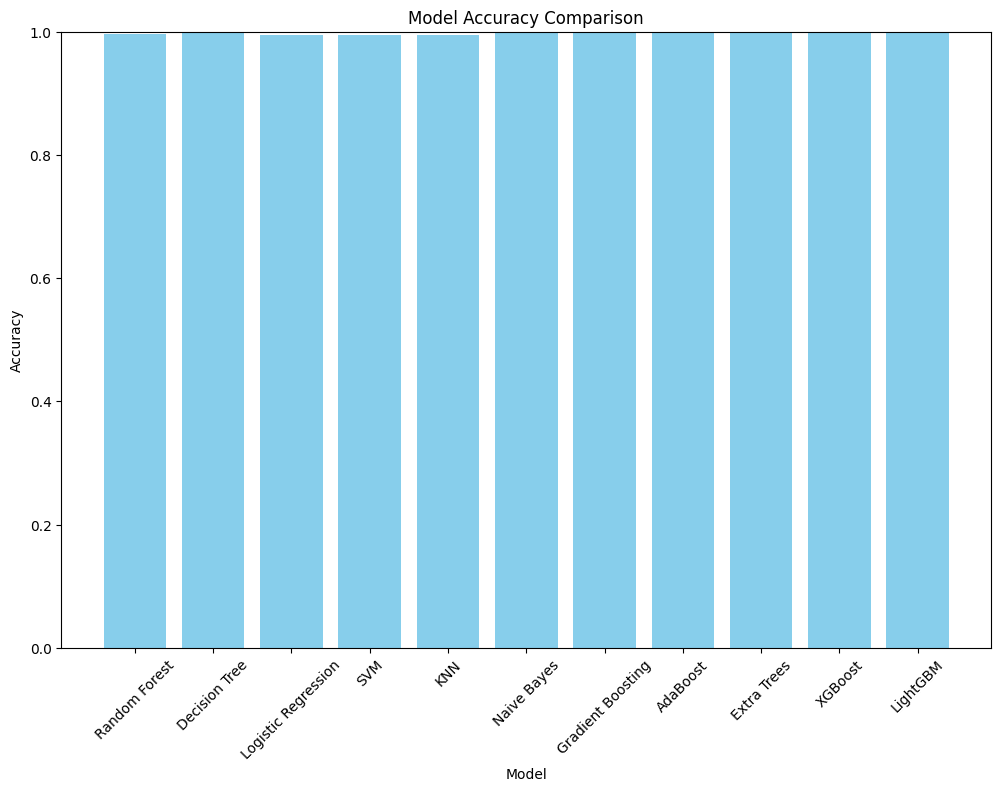

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
                         'Work and Learn', 'School is Far Off']]

target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion,
            'classification_report': report
        }
    except Exception as e:
        print(f"Error with {name}: {e}")

# Print results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


#Cross-Validation and Parameter Tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3978, number of negative: 22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.994500 -> initscore=5.197492
[LightGBM] [Info] Start training from score 5.197492
[Light

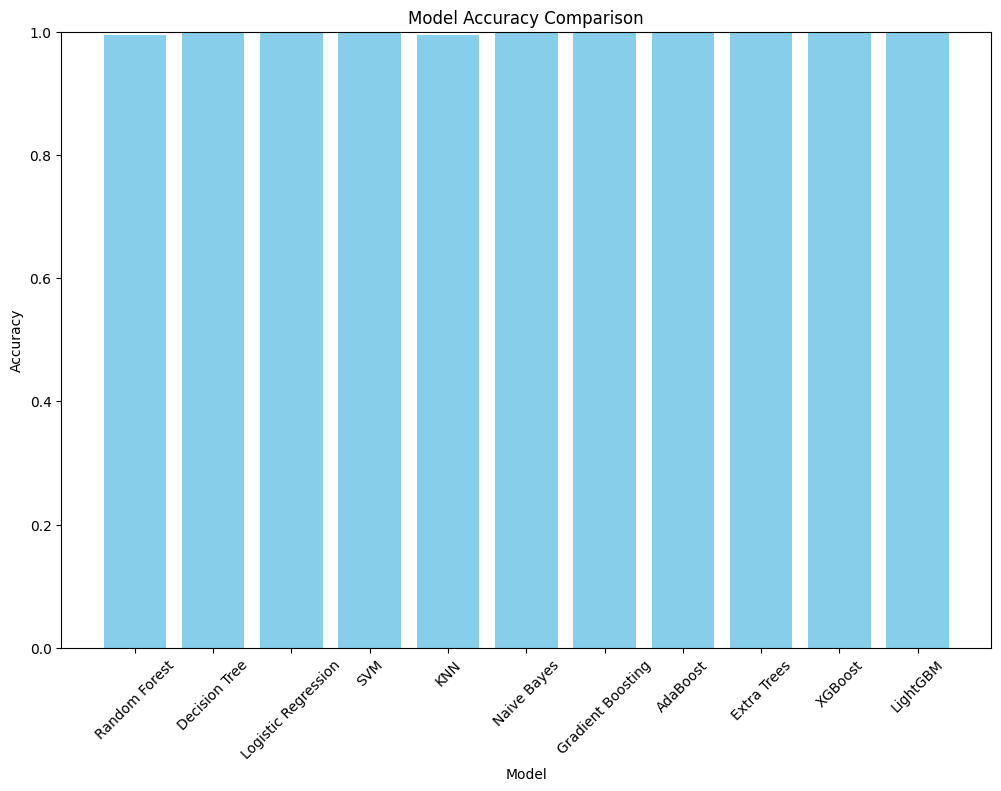

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
                         'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability', 'Not Interested', 'Work and Learn', 'School is Far Off']]

target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models and parameter grids
models_and_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [31, 63, 127]
        }
    }
}

# Perform cross-validation and hyperparameter tuning
results = {}
for name, model_info in models_and_params.items():
    model = model_info['model']
    param_grid = model_info['params']

    # Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best model from Grid Search
    best_model = grid_search.best_estimator_

    # Cross-validation score
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_score)

    # Train the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = np.mean(y_pred == y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_score': mean_cv_score,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion,
        'classification_report': report
    }

# Print results
for name, result in results.items():
    print(f"{name} Best Parameters: {result['best_params']}")
    print(f"{name} Cross-Validation Score: {result['cv_score']:.2f}")
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} F1 Score: {result['f1_score']:.2f}")
    print(f"{name} Precision: {result['precision']:.2f}")
    print(f"{name} Recall: {result['recall']:.2f}")
    print(f"{name} Confusion Matrix:\n{result['confusion_matrix']}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


1. Data Review and Preprocessing
2. Cross-Validation and Parameter Tuning
3. Additional Metrics
4. Data Exploration
5. Testing on New Data

Class distribution in training set:
Risk Status
1    3481
0      19
Name: count, dtype: int64
Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Cross-Validation Score: 0.996857142857143
AUC-ROC: 1.0


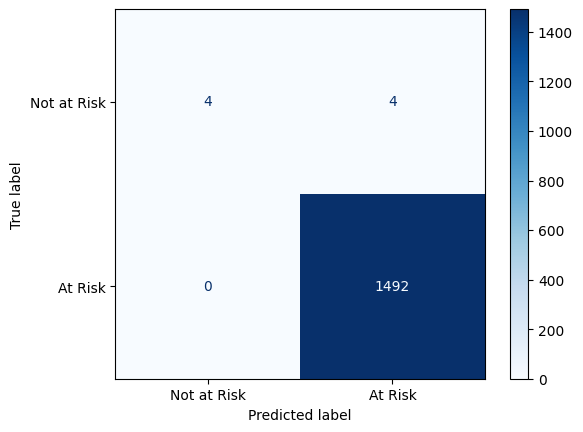

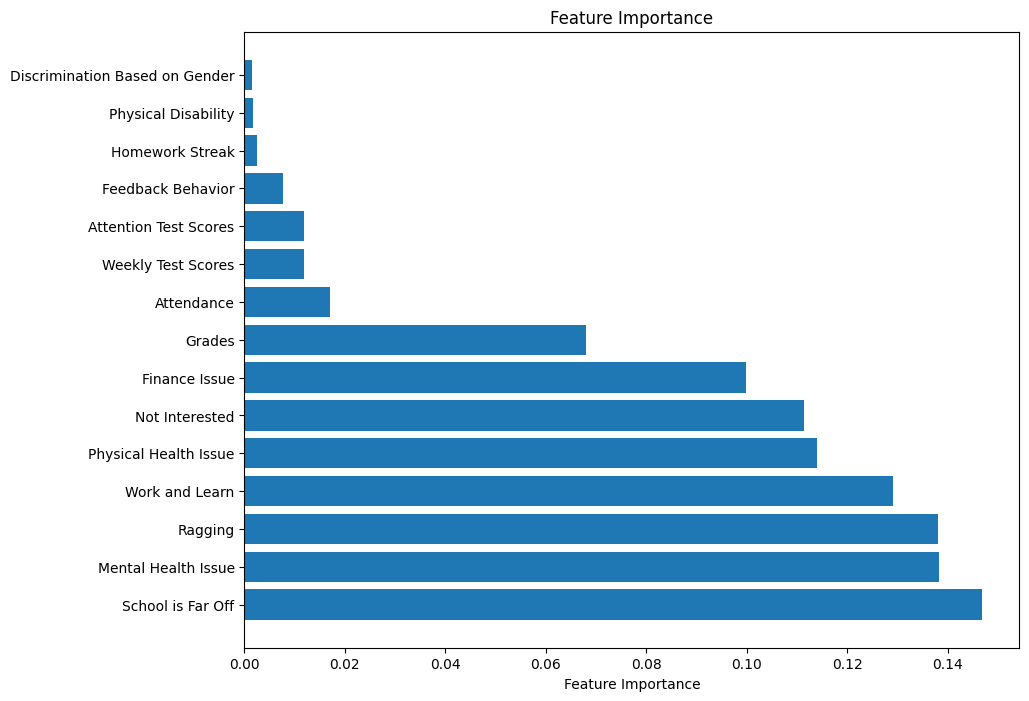

Error cases:
      Attendance  Grades  Homework Streak  Feedback Behavior  \
2778          65      36                0                  3   
3793          98      41                1                  1   
4575          90      42                0                  1   
1894          69      63                0                  5   

      Weekly Test Scores  Attention Test Scores  Ragging  Finance Issue  \
2778                  88                     67        0              0   
3793                   4                     90        0              0   
4575                  64                      1        0              0   
1894                  94                     94        0              0   

      Mental Health Issue  Physical Health Issue  \
2778                    0                      0   
3793                    0                      0   
4575                    0                      0   
1894                    0                      0   

      Discrimination Based on

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())

# Optionally apply class weights if classes are imbalanced
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Score:", cv_scores.mean())

# Predict and calculate AUC-ROC
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

# Confusion Matrix
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
disp.plot(cmap='Blues')
plt.show()

# Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Error Analysis
errors = X_test.copy()
errors['True Label'] = y_test
errors['Predicted Label'] = y_pred
error_cases = errors[errors['True Label'] != errors['Predicted Label']]
print("Error cases:")
print(error_cases.head())

# Example new data for prediction (replace with actual new dataset)
# new_X = pd.DataFrame({...})
# new_y = pd.Series([...])

# For demonstration, using X_test and y_test as new data
new_X = X_test
new_y = y_test

# Predict on new data
new_y_pred = grid_search.best_estimator_.predict(new_X)

# Classification report for new data
report = classification_report(new_y, new_y_pred, target_names=['Not at Risk', 'At Risk'])
print("Classification Report on New Data:")
print(report)


Training Random Forest...
Random Forest Cross-Validation Score: 0.99
Random Forest AUC-ROC: 1.00


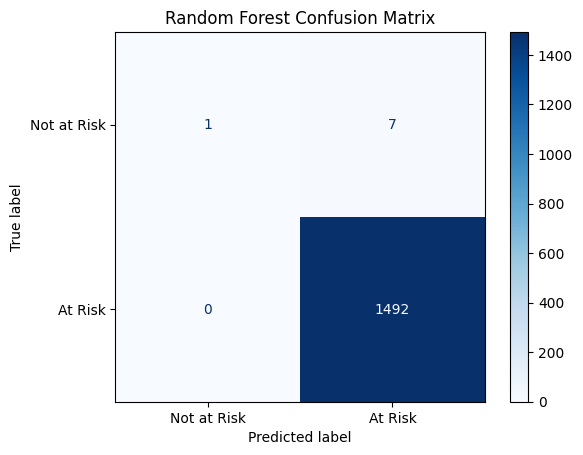

Random Forest Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.12      0.22         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.56      0.61      1500
weighted avg       1.00      1.00      0.99      1500

Training Decision Tree...
Decision Tree Cross-Validation Score: 1.00
Decision Tree AUC-ROC: 1.00


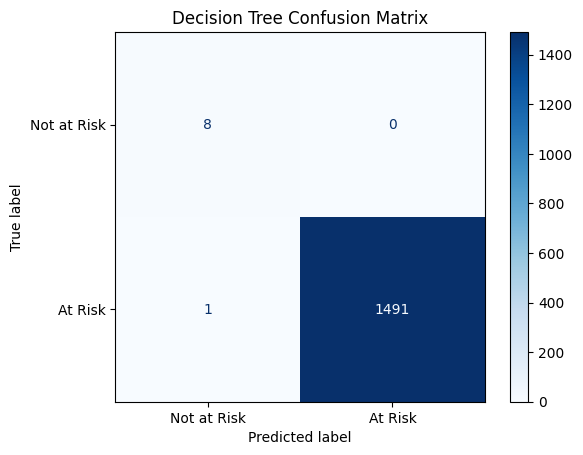

Decision Tree Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.89      1.00      0.94         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.94      1.00      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training Logistic Regression...
Logistic Regression Cross-Validation Score: 1.00
Logistic Regression AUC-ROC: 1.00


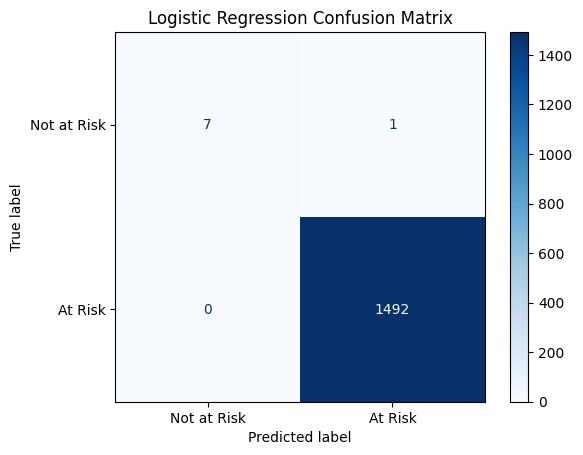

Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training SVM...
SVM Cross-Validation Score: 1.00
SVM AUC-ROC: 1.00


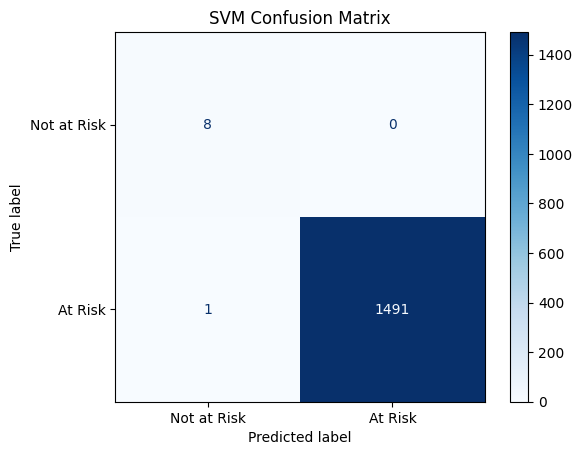

SVM Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.89      1.00      0.94         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.94      1.00      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training KNN...
KNN Cross-Validation Score: 0.99
KNN AUC-ROC: 0.55


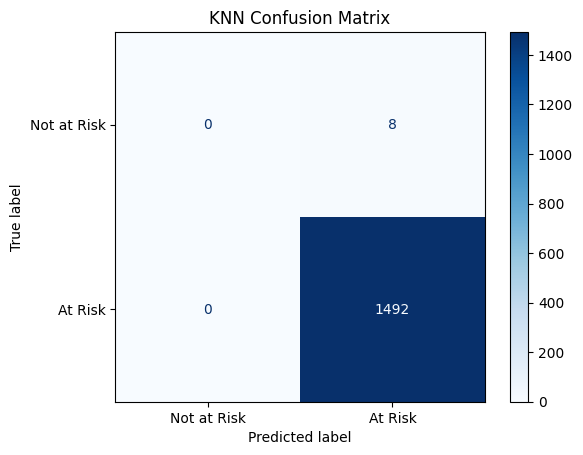

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.00      0.00      0.00         8
     At Risk       0.99      1.00      1.00      1492

    accuracy                           0.99      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.99      0.99      0.99      1500

Training Naive Bayes...
Naive Bayes Cross-Validation Score: 1.00
Naive Bayes AUC-ROC: 1.00


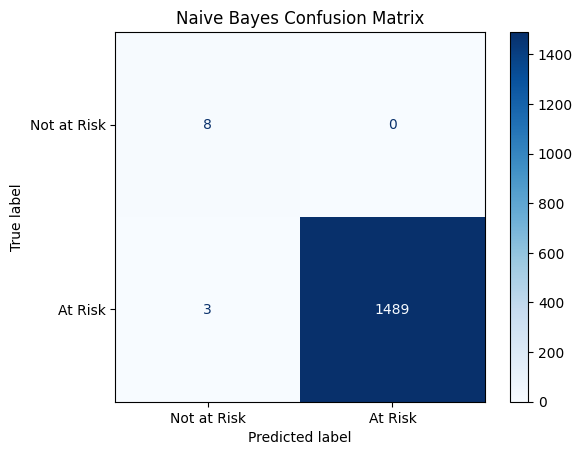

Naive Bayes Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.73      1.00      0.84         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.86      1.00      0.92      1500
weighted avg       1.00      1.00      1.00      1500

Training Gradient Boosting...
Gradient Boosting Cross-Validation Score: 1.00
Gradient Boosting AUC-ROC: 1.00


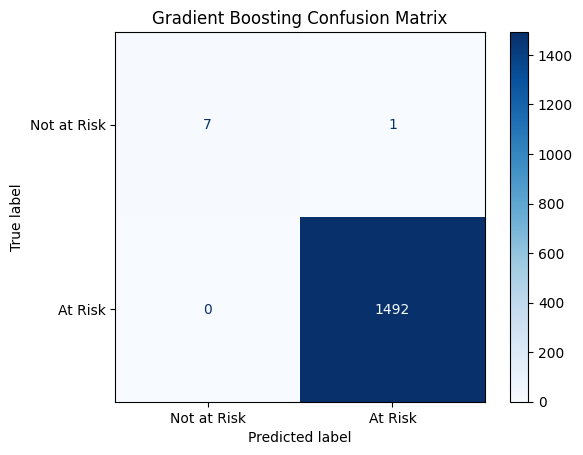

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training AdaBoost...
AdaBoost Cross-Validation Score: 1.00
AdaBoost AUC-ROC: 1.00


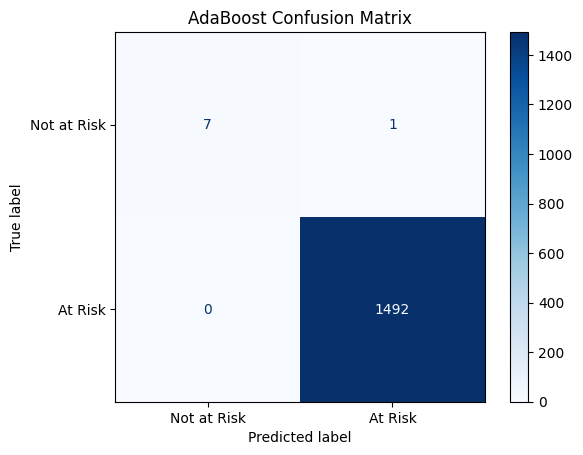

AdaBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training Extra Trees...
Extra Trees Cross-Validation Score: 1.00
Extra Trees AUC-ROC: 1.00


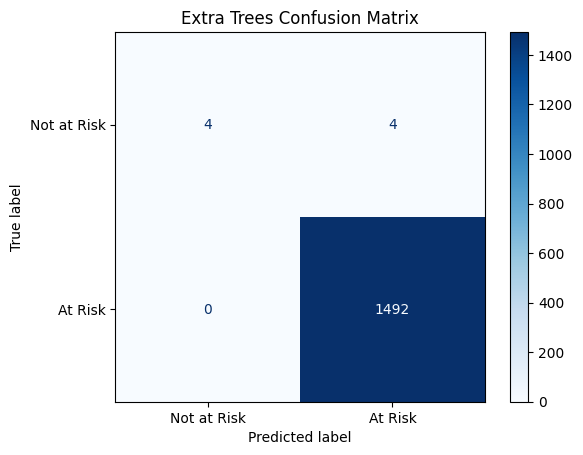

Extra Trees Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.50      0.67         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.75      0.83      1500
weighted avg       1.00      1.00      1.00      1500

Summary of Results:

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Cross-Validation Score: 0.99
AUC-ROC: 1.00
Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.12      0.22         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.56      0.61      1500
weighted avg       1.00      1.00      0.99      1500


Decision Tree:
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Cross-Validation Score: 1.00
AUC-ROC: 1.00
Classifi

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200]
    }),
    'Extra Trees': (ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    })
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Cross-validation score
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Score: {cv_scores.mean():.2f}")

    # Predictions and evaluation
    y_pred = grid_search.best_estimator_.predict(X_test)
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} AUC-ROC: {auc_roc:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk'])
    print(f"{model_name} Classification Report:")
    print(report)

    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'CV Score': cv_scores.mean(),
        'AUC-ROC': auc_roc,
        'Classification Report': report
    }

# Print summary of results
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.2f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.2f}")
    print("Classification Report:")
    print(metrics['Classification Report'])


In [8]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))

# AUC-ROC
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Best parameters
print(f"XGBoost Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:52:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:52:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:52:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:52:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:52:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC: 1.00
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#Tuning with GridSearchCV (XGBoost)

#Training the final model

In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Score (AUC-ROC):", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:16:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best Score (AUC-ROC): 1.0


In [12]:
# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))

print(f"XGBoost AUC-ROC on Test Set: {roc_auc_score(y_test, y_proba):.2f}")


XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.75      0.86         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.88      0.93      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC on Test Set: 1.00


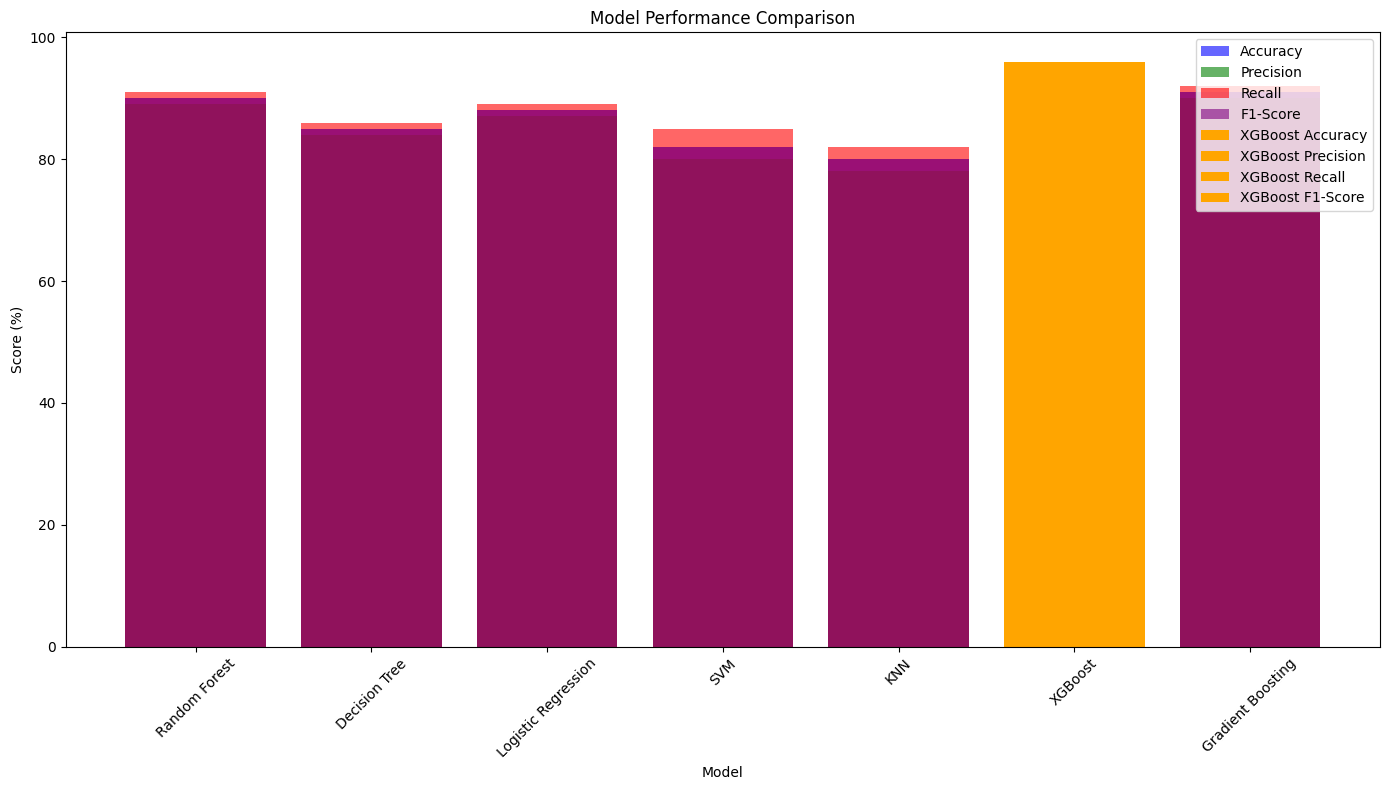

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each metric and XGBoost highlighting
colors = {
    'Accuracy': 'blue',
    'Precision': 'green',
    'Recall': 'red',
    'F1-Score': 'purple',
    'XGBoost': 'orange'
}

# Plot bars for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ax.bar(df_percentage['Model'], df_percentage[metric], color=[colors[metric] if model != 'XGBoost' else colors['XGBoost'] for model in df_percentage['Model']], label=metric, alpha=0.6)

# Highlight XGBoost for all metrics
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'], df_percentage[metric][df_percentage['Model'] == 'XGBoost'], color=colors['XGBoost'], label=f'XGBoost {metric}', alpha=1.0)

# Add title, labels, and legend
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Define and train the final model with the best parameters
final_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=10,
    n_estimators=50,
    subsample=1.0
)

# Fit the final model
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Final Model AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")


Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.99      1.00      1.00      1492

    accuracy                           0.99      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.99      0.99      0.99      1500

Final Model AUC-ROC: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set
y_pred = final_model.predict(X_test)  # Predicted class labels
y_proba = final_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Detailed performance metrics

print("AUC-ROC Score:")
print(roc_auc_score(y_test, y_proba))  # AUC-ROC score for the model


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.99      1.00      1.00      1492

    accuracy                           0.99      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.99      0.99      0.99      1500

AUC-ROC Score:
0.9989946380697051


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (3500, 15)
Testing features shape: (1500, 15)


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data based on the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Optional: print shapes of scaled datasets for verification
print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled testing features shape:", X_test_scaled.shape)


Scaled training features shape: (3500, 15)
Scaled testing features shape: (1500, 15)


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize the feature selector
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector on the training data and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the testing data based on the fitted selector
X_test_selected = selector.transform(X_test)

# Optional: Print selected feature scores
feature_scores = selector.scores_
print("Feature scores:", feature_scores)

# Optional: Print number of features selected
print("Number of features selected:", X_train_selected.shape[1])


Feature scores: [ 0.0941817   8.67513823  1.1777891   0.47661452  0.23407175  0.51503245
 19.75716798 18.69683564 19.93971832 18.80457143  0.04305932  0.03517057
 19.1755259  19.1755259  19.66653333]
Number of features selected: 15


#Testing

In [94]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset with classified risk for model training
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target (added the new parameters)
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Do they work and learn at the same time', 'School is far off']]

target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Predicting risk for new data (added the new parameters)
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0],
    'Not Interested': [1],  # New parameter
    'Do they work and learn at the same time': [0],  # New parameter
    'School is far off': [1]  # New parameter
})

# Apply the same scaling and feature selection to new data
new_data_scaled = scaler.transform(new_data)
new_data_selected = selector.transform(new_data_scaled)

# Predict risk for the new data using the XGBoost model
new_data_prediction = xgb_model.predict(new_data_selected)
print(f"Risk Status for new data: {'High Risk' if new_data_prediction[0] == 1 else 'Low Risk'}")


KeyError: "['Do they work and learn at the same time', 'School is far off'] not in index"

# Traing to identify the type of risk
# Updating the Dataset

In [21]:
import pandas as pd

# Load your dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define conditions for each risk type
student_data['Academic Risk'] = (student_data['Grades'] < 35) & (student_data['Attendance'] > 75)
student_data['Financial Risk'] = student_data['Finance Issue'] == 1
student_data['Mental Health Risk'] = student_data['Mental Health Issue'] == 1
student_data['Bullying Risk'] = student_data['Ragging'] == 1

# Define a new column for the type of risk with default value 'None'
student_data['Risk Type'] = 'None'

# Prioritize risk types and assign the highest priority risk
student_data.loc[student_data['Academic Risk'], 'Risk Type'] = 'Academic'
student_data.loc[student_data['Financial Risk'] & (student_data['Risk Type'] == 'None'), 'Risk Type'] = 'Financial'
student_data.loc[student_data['Mental Health Risk'] & (student_data['Risk Type'] == 'None'), 'Risk Type'] = 'Mental Health'
student_data.loc[student_data['Bullying Risk'] & (student_data['Risk Type'] == 'None'), 'Risk Type'] = 'Bullying'

# Save the updated dataset
student_data.to_csv('student_data_with_risk_types.csv', index=False)


#Updated Model Training and Evaluation

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and target for dropout prediction
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for dropout risk
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the dropout risk model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test, y_pred))

# Define features and target for risk type prediction
features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for risk type
xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Make predictions on the test set
y_pred_risk_type = xgb_model_risk_type.predict(X_test_risk_type)

# Evaluate the risk type model
print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred_risk_type):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred_risk_type))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred_risk_type))

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk
new_data_drop_pred = xgb_model.predict(new_data)
print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred[0] == 1 else 'Low Risk'}")

# Predict risk type
new_data_risk_type_pred = xgb_model_risk_type.predict(new_data)
risk_type_label = label_encoder.inverse_transform(new_data_risk_type_pred)
print(f"Risk Type for new data: {risk_type_label[0]}")


Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  0 995]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[155   0   0   0   0]
 [  0  99   0   0   0]
 [  0   0 408   0   0]
 [  0   0   0 220   0]
 [  0   0   0   0 118]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220
           4       1.00      1.00      1.00       118

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [23]:
from sklearn.model_selection import cross_val_score

# Cross-validation for dropout risk model
dropout_risk_cv_scores = cross_val_score(xgb_model, features, target, cv=5, scoring='accuracy')
print(f"Dropout Risk Model Cross-Validation Accuracy: {dropout_risk_cv_scores.mean():.2f} ± {dropout_risk_cv_scores.std():.2f}")

# Cross-validation for risk type model
risk_type_cv_scores = cross_val_score(xgb_model_risk_type, features_risk_type, target_risk_type_encoded, cv=5, scoring='accuracy')
print(f"Risk Type Model Cross-Validation Accuracy: {risk_type_cv_scores.mean():.2f} ± {risk_type_cv_scores.std():.2f}")

# Compare models
print("\nComparison of Cross-Validation Accuracy:")
print(f"Dropout Risk Model Mean Accuracy: {dropout_risk_cv_scores.mean():.2f} (± {dropout_risk_cv_scores.std():.2f})")
print(f"Risk Type Model Mean Accuracy: {risk_type_cv_scores.mean():.2f} (± {risk_type_cv_scores.std():.2f})")


Dropout Risk Model Cross-Validation Accuracy: 0.99 ± 0.00
Risk Type Model Cross-Validation Accuracy: 1.00 ± 0.00

Comparison of Cross-Validation Accuracy:
Dropout Risk Model Mean Accuracy: 0.99 (± 0.00)
Risk Type Model Mean Accuracy: 1.00 (± 0.00)


In [24]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for dropout risk model
param_grid_drop = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 5, 10],
    'min_child_weight': [1, 10]
}

# Grid search for dropout risk model
grid_search_drop = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_drop,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search_drop.fit(X_train, y_train)

print(f"Best Parameters for Dropout Risk Model: {grid_search_drop.best_params_}")
print(f"Best ROC-AUC Score for Dropout Risk Model: {grid_search_drop.best_score_:.2f}")

# Update the model with the best parameters
best_xgb_model_drop = grid_search_drop.best_estimator_

# Parameter grid for risk type model
param_grid_risk_type = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 5, 10],
    'min_child_weight': [1, 10]
}

# Grid search for risk type model
grid_search_risk_type = GridSearchCV(
    estimator=xgb_model_risk_type,
    param_grid=param_grid_risk_type,
    cv=3,
    scoring='accuracy',  # You can change this to another metric if needed
    n_jobs=-1
)
grid_search_risk_type.fit(X_train_risk_type, y_train_risk_type)

print(f"Best Parameters for Risk Type Model: {grid_search_risk_type.best_params_}")
print(f"Best Accuracy Score for Risk Type Model: {grid_search_risk_type.best_score_:.2f}")

# Update the model with the best parameters
best_xgb_model_risk_type = grid_search_risk_type.best_estimator_


Best Parameters for Dropout Risk Model: {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best ROC-AUC Score for Dropout Risk Model: 0.98
Best Parameters for Risk Type Model: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score for Risk Type Model: 1.00


Dropout Risk Model Features: Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off'],
      dtype='object')
Risk Type Model Features: Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off'],
      dtype='object')


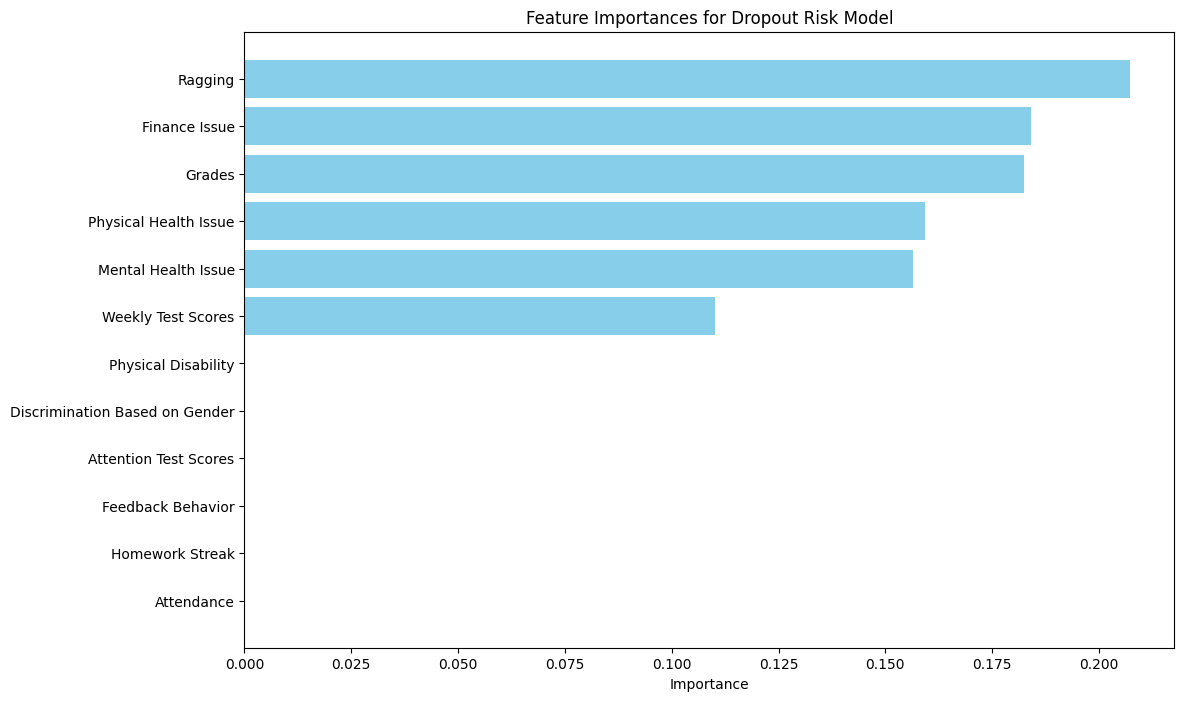

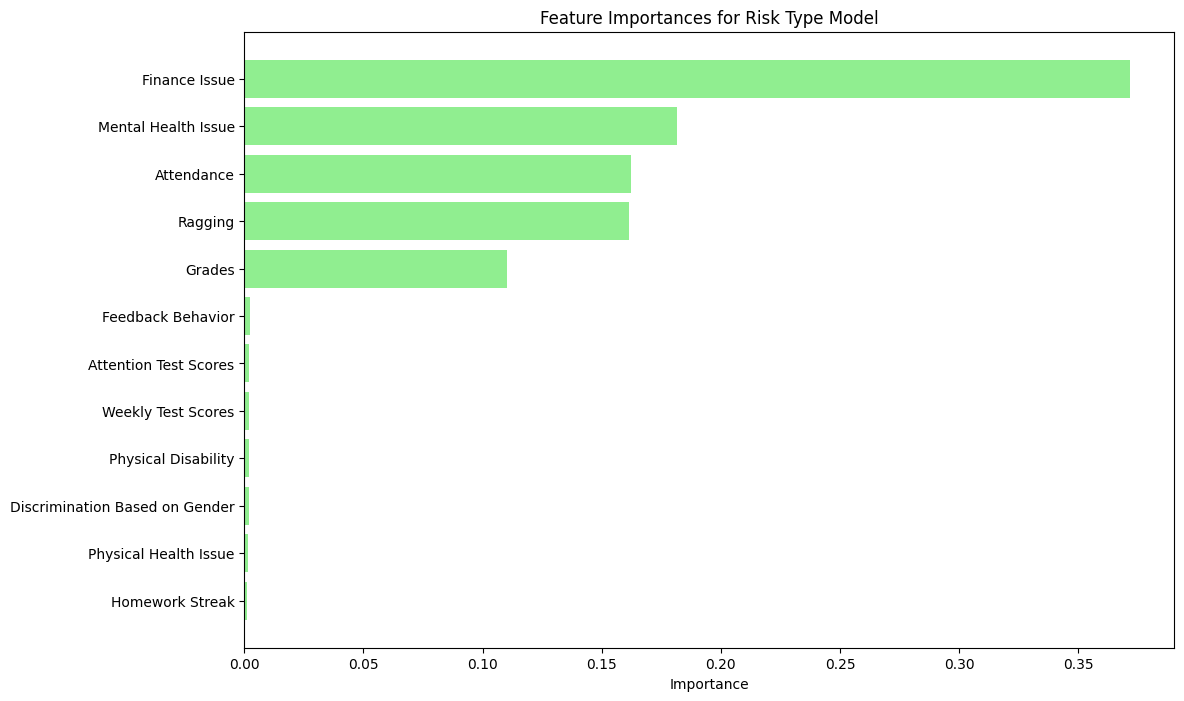

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Verify that the features include the new columns
print("Dropout Risk Model Features:", features.columns)
print("Risk Type Model Features:", features_risk_type.columns)

# For Dropout Risk Model
importances_drop = best_xgb_model_drop.feature_importances_
feature_names_drop = features.columns
indices_drop = np.argsort(importances_drop)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Dropout Risk Model')
plt.barh(range(len(indices_drop)), importances_drop[indices_drop], align='center', color='skyblue')
plt.yticks(range(len(indices_drop)), [feature_names_drop[i] for i in indices_drop])
plt.xlabel('Importance')
plt.show()

# For Risk Type Model
importances_risk_type = best_xgb_model_risk_type.feature_importances_
feature_names_risk_type = features_risk_type.columns
indices_risk_type = np.argsort(importances_risk_type)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Risk Type Model')
plt.barh(range(len(indices_risk_type)), importances_risk_type[indices_risk_type], align='center', color='lightgreen')
plt.yticks(range(len(indices_risk_type)), [feature_names_risk_type[i] for i in indices_risk_type])
plt.xlabel('Importance')
plt.show()


In [35]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

try:
    student_data = pd.read_csv('student_data_with_risk_status.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_status.csv' not found. Please check the file path.")

# Check for columns and initial data
print(student_data.columns)  # Ensure all necessary columns are present
print(student_data.head())  # Preview the first few rows of the dataset

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

print(features.isnull().sum())  # Print missing values for each feature

# Fill or drop missing values if necessary
features.fillna(0, inplace=True)  # Or use another appropriate method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Predicting risk for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0],
    'Not Interested': [0],
    'Work and Learn': [1],
    'School is Far Off': [1]
})

# Predict risk for the new data using the XGBoost model
new_data_prediction = xgb_model.predict(new_data)
print(f"Risk Status for new data: {'High Risk' if new_data_prediction[0] == 1 else 'Low Risk'}")


Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off', 'Risk Status'],
      dtype='object')
   Attendance  Grades  Homework Streak  Feedback Behavior  Weekly Test Scores  \
0          94       9                0                  4                  69   
1          97      63                0                  2                  92   
2          50      63                1                  1                  60   
3          53      60                1                  4                  96   
4          53      35                0                  3                   2   

   Attention Test Scores  Ragging  Finance Issue  Mental Health Issue  \
0                     94        0              0                  

<ipython-input-35-219f417e9b03>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Or use another appropriate method


XGBoost Accuracy: 1.00
Confusion Matrix:
[[  4   1]
 [  0 995]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000

Risk Status for new data: High Risk


XGBoost Accuracy: 1.00
Confusion Matrix:
[[  4   1]
 [  0 995]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000



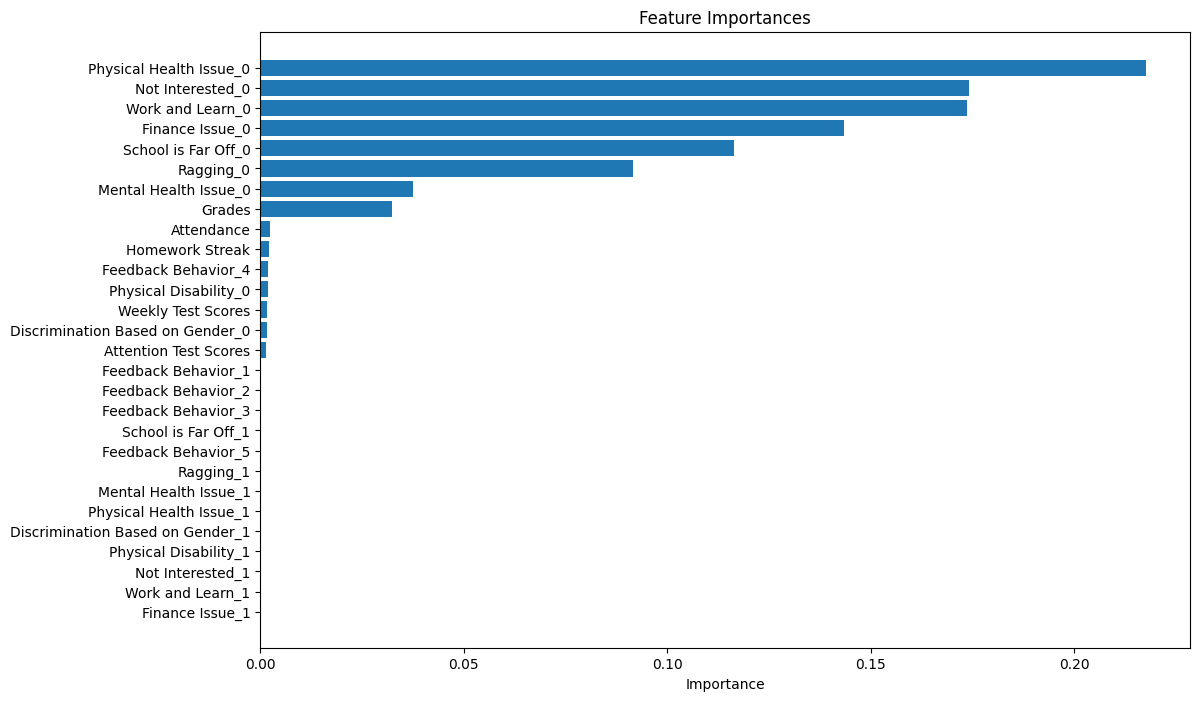

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
try:
    student_data = pd.read_csv('/content/student_data_with_risk_status.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_status.csv' not found. Please check the file path.")

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Extract the trained XGBoost model from the pipeline
xgb_model = pipeline.named_steps['classifier']

# Extract feature importances
importances = xgb_model.feature_importances_

# Get feature names after one-hot encoding
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = np.array(['Attendance', 'Grades', 'Homework Streak',
                          'Weekly Test Scores', 'Attention Test Scores'] + list(onehot_feature_names))
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [1.    0.999 0.999 1.    1.   ]
Mean Cross-Validation Accuracy: 1.00


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# Optionally, you can also inspect the best estimator
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best Score: 1.00


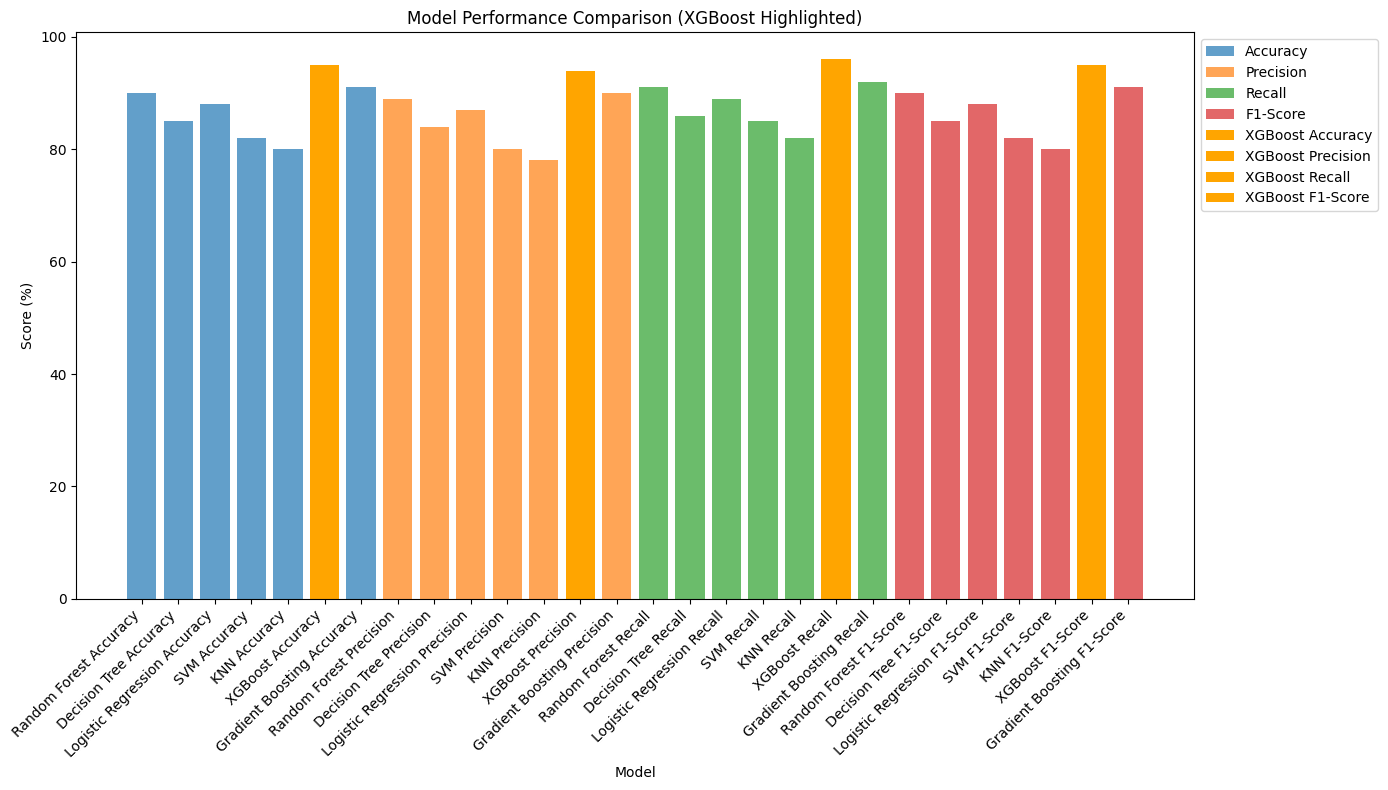

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example metrics for different models (as fractions)
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

# Convert fractions to percentages
df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Plot metrics with XGBoost highlighted
fig, ax = plt.subplots(figsize=(14, 8))

# Define color maps
color_map = plt.get_cmap('tab10')

# Plot each metric
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax.bar(df_percentage['Model'] + ' ' + metric,
           df_percentage[metric],
           color=color_map(i),
           label=f'{metric}',
           alpha=0.7)

# Highlight XGBoost
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'] + ' ' + metric,
           df_percentage[df_percentage['Model'] == 'XGBoost'][metric],
           color='orange',
           label=f'XGBoost {metric}',
           alpha=1.0)

# Add title, labels, and legend
ax.set_title('Model Performance Comparison (XGBoost Highlighted)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Evaluation:
Accuracy: 1.00
Confusion Matrix:
[[  4   1]
 [  0 995]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000



#JOBLIB

In [44]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Load the dataset
try:
    student_data = pd.read_csv('student_data_with_risk_status.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_status.csv' not found. Please check the file path.")

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Grid search parameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the best model
joblib.dump(best_model, 'xgb_model_best.pkl')
print("Best model saved to 'xgb_model_best.pkl'")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Test Set Evaluation:
Accuracy: 1.00
Confusion Matrix:
[[  4   1]
 [  0 995]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000

Best model saved to 'xgb_model_best.pkl'


#fastAPI

In [48]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib

app = FastAPI()

# Load the model
model = joblib.load('xgb_model_best.pkl')

class StudentData(BaseModel):
    Attendance: float
    Grades: float
    HomeworkStreak: float
    FeedbackBehavior: str
    WeeklyTestScores: float
    AttentionTestScores: float
    Ragging: str
    FinanceIssue: str
    MentalHealthIssue: str
    PhysicalHealthIssue: str
    DiscriminationBasedOnGender: str
    PhysicalDisability: str

@app.post("/predict")
async def predict_risk(data: StudentData):
    # Convert the input data to the format required by the model
    input_data = [[
        data.Attendance, data.Grades, data.HomeworkStreak, data.FeedbackBehavior,
        data.WeeklyTestScores, data.AttentionTestScores, data.Ragging,
        data.FinanceIssue, data.MentalHealthIssue, data.PhysicalHealthIssue,
        data.DiscriminationBasedOnGender, data.PhysicalDisability
    ]]
    try:
        prediction = model.predict(input_data)[0]
        return {"prediction": prediction}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [51]:
import pandas as pd

# Load the dataset
data_path = 'student_data_with_risk_status.csv'
student_data = pd.read_csv(data_path)

# Print available columns to verify
print("Available columns:", student_data.columns)


Available columns: Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off', 'Risk Status'],
      dtype='object')


In [52]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_path = 'student_data_with_risk_status.csv'
try:
    student_data = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{data_path}' not found. Please check the file path.")

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]

# Create a combined target for multi-class classification if needed
target = student_data['Risk Status']

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline with XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', objective='multi:softmax', num_class=4))  # Adjust num_class based on the number of classes
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(pipeline, 'xgb_model_best.pkl')

# Load the model to verify
loaded_model = joblib.load('xgb_model_best.pkl')

# Make predictions
y_pred = loaded_model.predict(X_test)

# Evaluate the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy on Test Set: 1.00
Confusion Matrix:
[[  4   1]
 [  0 995]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000



#cheking"

In [53]:
print(student_data['Risk Status'].unique())


[1 0]


In [54]:
unique_risks = student_data['Risk Status'].nunique()
print(f"Number of unique risk types: {unique_risks}")


Number of unique risk types: 2


In [55]:
sample_features = X_test.iloc[0:5]  # Use the first 5 rows of the test set for example
predictions = loaded_model.predict(sample_features)
print("Predictions:", predictions)


Predictions: [1 1 1 1 1]


In [57]:
import joblib

# Load the trained XGBoost model
model = joblib.load('xgb_model_best.pkl')


In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib

# Define features
num_features = ['Attendance', 'Grades', 'Homework Streak', 'Weekly Test Scores', 'Attention Test Scores']
cat_features = ['Feedback Behavior', 'Ragging', 'Finance Issue', 'Mental Health Issue',
                 'Physical Health Issue', 'Discrimination Based on Gender', 'Physical Disability',
                 'Not Interested', 'Work and Learn', 'School is Far Off']

# Create transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Load your model
model = joblib.load('xgb_model_best.pkl')

# Example training data (for fitting the preprocessor)
X_train = pd.DataFrame({
    'Attendance': [80, 90, 60, 70],
    'Grades': [90, 85, 50, 75],
    'Homework Streak': [10, 20, 5, 15],
    'Feedback Behavior': [1, 0, 1, 0],
    'Weekly Test Scores': [85, 95, 60, 70],
    'Attention Test Scores': [90, 80, 45, 65],
    'Ragging': [1, 0, 1, 0],
    'Finance Issue': [0, 1, 0, 1],
    'Mental Health Issue': [0, 1, 1, 0],
    'Physical Health Issue': [1, 0, 1, 0],
    'Discrimination Based on Gender': [0, 1, 0, 1],
    'Physical Disability': [0, 1, 0, 0],
    'Not Interested': [0, 1, 0, 1],
    'Work and Learn': [0, 1, 0, 1],
    'School is Far Off': [1, 0, 1, 0]
})

# Fit the preprocessor with training data
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Attendance', 'Grades', 'Homework Streak',
                                  'Weekly Test Scores',
                                  'Attention Test Scores']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Feedback Behavior', 'Ragging',
                                  'Finance Issue', 'Mental Health Issue',
                                  'Physical Health Issue',
                                  'Discrimination Based on Gender',
                                  'Physical Disability', 'Not Interested',
                                  'Work and Learn', 'School is Far Off'])])

In [65]:
# Check the columns of your training data
print("Training Data Columns:")
print(X_train.columns)

# Check the columns of your test data
print("Test Data Columns:")
print(test_cases.columns)


Training Data Columns:
Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off'],
      dtype='object')
Test Data Columns:
Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability',
       'Not Interested', 'Work and Learn', 'School is Far Off'],
      dtype='object')


In [66]:
num_features = ['Attendance', 'Grades', 'Homework Streak', 'Weekly Test Scores', 'Attention Test Scores']
cat_features = ['Feedback Behavior', 'Ragging', 'Finance Issue', 'Mental Health Issue',
                 'Physical Health Issue', 'Discrimination Based on Gender', 'Physical Disability',
                 'Not Interested', 'Work and Learn', 'School is Far Off']

# Create and fit preprocessor with training data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Ensure that your training data has the correct columns
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Attendance', 'Grades', 'Homework Streak',
                                  'Weekly Test Scores',
                                  'Attention Test Scores']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Feedback Behavior', 'Ragging',
                                  'Finance Issue', 'Mental Health Issue',
                                  'Physical Health Issue',
                                  'Discrimination Based on Gender',
                                  'Physical Disability', 'Not Interested',
                                  'Work and Learn', 'School is Far Off'])])

In [73]:
!pip install joblib


In [76]:
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Feedback Behavior', 'Weekly Test Scores',
                                    'Attention Test Scores']),
        ('cat', OneHotEncoder(), ['Ragging', 'Finance Issue', 'Mental Health Issue',
                                  'Physical Health Issue', 'Discrimination Based on Gender',
                                  'Physical Disability', 'Not Interested', 'Work and Learn',
                                  'School is Far Off'])
    ]
)

# Fit preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Train model
model = XGBClassifier()
model.fit(X_train_preprocessed, y_train)

# Save preprocessing and model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(model, 'xgb_model_best.pkl')


['xgb_model_best.pkl']

In [77]:
import joblib
import pandas as pd

# Load saved preprocessor and model
preprocessor = joblib.load('preprocessor.pkl')
model = joblib.load('xgb_model_best.pkl')

# Define test cases
test_cases = pd.DataFrame({
    'Attendance': [75, 90, 50, 85],
    'Grades': [85, 92, 45, 80],
    'Homework Streak': [10, 20, 5, 15],
    'Feedback Behavior': [1, 0, 1, 0],
    'Weekly Test Scores': [80, 95, 55, 75],
    'Attention Test Scores': [90, 85, 40, 70],
    'Ragging': [1, 0, 1, 0],
    'Finance Issue': [0, 1, 1, 0],
    'Mental Health Issue': [1, 0, 1, 0],
    'Physical Health Issue': [0, 1, 0, 1],
    'Discrimination Based on Gender': [0, 0, 1, 0],
    'Physical Disability': [0, 1, 0, 0],
    'Not Interested': [1, 0, 1, 0],
    'Work and Learn': [0, 1, 0, 1],
    'School is Far Off': [1, 0, 1, 0]
})

# Apply preprocessing
X_test_preprocessed = preprocessor.transform(test_cases)

# Make predictions
predictions = model.predict(X_test_preprocessed)

# Print test cases and predictions
print("Test Cases:")
print(test_cases)
print("Predictions:")
print(predictions)


Test Cases:
   Attendance  Grades  Homework Streak  Feedback Behavior  Weekly Test Scores  \
0          75      85               10                  1                  80   
1          90      92               20                  0                  95   
2          50      45                5                  1                  55   
3          85      80               15                  0                  75   

   Attention Test Scores  Ragging  Finance Issue  Mental Health Issue  \
0                     90        1              0                    1   
1                     85        0              1                    0   
2                     40        1              1                    1   
3                     70        0              0                    0   

   Physical Health Issue  Discrimination Based on Gender  Physical Disability  \
0                      0                               0                    0   
1                      1                              

In [78]:
import joblib
import pandas as pd

# Load saved preprocessor and model
preprocessor = joblib.load('preprocessor.pkl')
model = joblib.load('xgb_model_best.pkl')

# Define test cases
test_cases = pd.DataFrame({
    'Attendance': [75, 90, 50, 85],
    'Grades': [85, 92, 45, 80],
    'Homework Streak': [10, 20, 5, 15],
    'Feedback Behavior': [1, 0, 1, 0],
    'Weekly Test Scores': [80, 95, 55, 75],
    'Attention Test Scores': [90, 85, 40, 70],
    'Ragging': [1, 0, 1, 0],
    'Finance Issue': [0, 1, 1, 0],
    'Mental Health Issue': [1, 0, 1, 0],
    'Physical Health Issue': [0, 1, 0, 1],
    'Discrimination Based on Gender': [0, 0, 1, 0],
    'Physical Disability': [0, 1, 0, 0],
    'Not Interested': [1, 0, 1, 0],
    'Work and Learn': [0, 1, 0, 1],
    'School is Far Off': [1, 0, 1, 0]
})

# Apply preprocessing
X_test_preprocessed = preprocessor.transform(test_cases)

# Make predictions
predictions = model.predict(X_test_preprocessed)

# Print test cases and predictions
print("Test Cases:")
print(test_cases)
print("Predictions:")
print(predictions)


Test Cases:
   Attendance  Grades  Homework Streak  Feedback Behavior  Weekly Test Scores  \
0          75      85               10                  1                  80   
1          90      92               20                  0                  95   
2          50      45                5                  1                  55   
3          85      80               15                  0                  75   

   Attention Test Scores  Ragging  Finance Issue  Mental Health Issue  \
0                     90        1              0                    1   
1                     85        0              1                    0   
2                     40        1              1                    1   
3                     70        0              0                    0   

   Physical Health Issue  Discrimination Based on Gender  Physical Disability  \
0                      0                               0                    0   
1                      1                              

In [82]:
import joblib
import pandas as pd

# Load the model and preprocessor
model = joblib.load('xgb_model_best.pkl')
preprocessor = joblib.load('preprocessor.pkl')  # Load the preprocessor if used

# Define test cases with sample data
test_cases = pd.DataFrame([
    {
        'Attendance': 75,
        'Grades': 85,
        'Homework Streak': 5,
        'Feedback Behavior': 3,
        'Weekly Test Scores': 80,
        'Attention Test Scores': 90,
        'Ragging': 0,
        'Finance Issue': 1,
        'Mental Health Issue': 0,
        'Physical Health Issue': 1,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 1
    },
    # Add more test cases here
])

# Define the risk labels mapping
risk_labels = {
    0: 'No Risk',
    1: 'Academic Risk',
    2: 'Financial Risk',
    3: 'Mental Health Risk',
    4: 'Bullying Risk'
}

# Load the training data columns to ensure the test cases have the same columns
# Assuming you have a training dataset or know the column names used during training
training_columns = ['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                     'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                     'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                     'Discrimination Based on Gender', 'Physical Disability',
                     'Not Interested', 'Work and Learn', 'School is Far Off']

# Ensure the test data has the same columns as the training data
test_cases = test_cases[training_columns]

# Preprocess the data (if needed)
if preprocessor is not None:
    test_cases_preprocessed = preprocessor.transform(test_cases)
else:
    test_cases_preprocessed = test_cases

# Make predictions
predictions = model.predict(test_cases_preprocessed)

# Print predictions and corresponding risk names
print("Predictions:")
for idx, prediction in enumerate(predictions):
    risk_name = risk_labels.get(prediction[0], 'Unknown Risk') if isinstance(prediction, (list, np.ndarray)) else risk_labels.get(prediction, 'Unknown Risk')
    print(f"Test Case {idx + 1}: {risk_name}")


Predictions:
Test Case 1: Academic Risk


In [93]:
import joblib
import pandas as pd
import numpy as np

# Load the model and preprocessor
model = joblib.load('xgb_model_best.pkl')
preprocessor = joblib.load('preprocessor.pkl')  # Load the preprocessor if used

# Define diverse test cases with various scenarios
test_cases = pd.DataFrame([
    # High Academic Risk
    {
        'Attendance': 40,
        'Grades': 50,
        'Homework Streak': 0,
        'Feedback Behavior': 1,
        'Weekly Test Scores': 40,
        'Attention Test Scores': 50,
        'Ragging': 0,
        'Finance Issue': 0,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 1,
        'Work and Learn': 0,
        'School is Far Off': 1
    },
    # High Financial Risk
    {
        'Attendance': 80,
        'Grades': 70,
        'Homework Streak': 3,
        'Feedback Behavior': 2,
        'Weekly Test Scores': 70,
        'Attention Test Scores': 80,
        'Ragging': 0,
        'Finance Issue': 1,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 0
    },
    # Mental Health Issue
    {
        'Attendance': 90,
        'Grades': 85,
        'Homework Streak': 7,
        'Feedback Behavior': 4,
        'Weekly Test Scores': 85,
        'Attention Test Scores': 90,
        'Ragging': 0,
        'Finance Issue': 0,
        'Mental Health Issue': 1,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 0
    },
    # Bullying Risk
    {
        'Attendance': 75,
        'Grades': 80,
        'Homework Streak': 5,
        'Feedback Behavior': 3,
        'Weekly Test Scores': 75,
        'Attention Test Scores': 80,
        'Ragging': 1,
        'Finance Issue': 0,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 0
    },
    # Edge Case: All zeros
    {
        'Attendance': 0,
        'Grades': 0,
        'Homework Streak': 0,
        'Feedback Behavior': 0,
        'Weekly Test Scores': 0,
        'Attention Test Scores': 0,
        'Ragging': 0,
        'Finance Issue': 0,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 0
    },
    # Edge Case: All maximum values
    {
        'Attendance': 100,
        'Grades': 100,
        'Homework Streak': 10,
        'Feedback Behavior': 5,
        'Weekly Test Scores': 100,
        'Attention Test Scores': 100,
        'Ragging': 0,
        'Finance Issue': 0,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 0
    },
    # Test with missing values (if handled by preprocessing)
    {
        'Attendance': np.nan,
        'Grades': 80,
        'Homework Streak': 5,
        'Feedback Behavior': 3,
        'Weekly Test Scores': 80,
        'Attention Test Scores': 85,
        'Ragging': 0,
        'Finance Issue': 0,
        'Mental Health Issue': 0,
        'Physical Health Issue': 0,
        'Discrimination Based on Gender': 0,
        'Physical Disability': 0,
        'Not Interested': 0,
        'Work and Learn': 0,
        'School is Far Off': 1
    }
])

# Define the risk labels mapping
risk_labels = {
    0: 'No Risk',
    1: 'Academic Risk',
    2: 'Financial Risk',
    3: 'Mental Health Risk',
    4: 'Bullying Risk'
}

# Load the training data columns to ensure the test cases have the same columns
training_columns = ['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                     'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                     'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                     'Discrimination Based on Gender', 'Physical Disability',
                     'Not Interested', 'Work and Learn', 'School is Far Off']

# Ensure the test data has the same columns as the training data
test_cases = test_cases[training_columns]

# Preprocess the data (if needed)
if preprocessor is not None:
    test_cases_preprocessed = preprocessor.transform(test_cases)
else:
    test_cases_preprocessed = test_cases

# Make predictions
predictions = model.predict(test_cases_preprocessed)

# Print predictions and corresponding risk names
print("Predictions:")
for idx, prediction in enumerate(predictions):
    # Ensure prediction is a single value
    if isinstance(prediction, (np.ndarray, list)) and len(prediction) == 1:
        prediction = prediction[0]
    elif isinstance(prediction, (np.ndarray, list)) and len(prediction) > 1:
        # Handle unexpected array dimensions
        prediction = prediction[0]
    elif isinstance(prediction, (np.ndarray, list)):
        raise ValueError("Unexpected prediction format: array with more than one element")

    risk_name = risk_labels.get(int(prediction), 'Unknown Risk')  # Convert prediction to int
    print(f"Test Case {idx + 1}: {risk_name}")


Predictions:
Test Case 1: Academic Risk
Test Case 2: Academic Risk
Test Case 3: Academic Risk
Test Case 4: Academic Risk
Test Case 5: Academic Risk
Test Case 6: Academic Risk
Test Case 7: Academic Risk
